In [ ]:
## imports for data analysis
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy as sc
import sklearn as sk
import warnings
warnings.simplefilter(action='ignore')
sns.set()
plt.style.use("ggplot")
%matplotlib inline


In [ ]:
## Installs pyreadstat module
!pip install pyreadstat

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 18.6 MB/s eta 0:00:00


In [ ]:
## Read data
df = pd.read_csv('diabetes.csv')

In [ ]:
#Verify the csv has been read
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
#Verifying the shape
df.shape

(768, 9)

In [ ]:
#Verifying all columns are present
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.000,3.845,3.370,0.000,1.000,3.000,6.000,17.000
Glucose,768.000,120.895,31.973,0.000,99.000,117.000,140.250,199.000
BloodPressure,768.000,69.105,19.356,0.000,62.000,72.000,80.000,122.000
SkinThickness,768.000,20.536,15.952,0.000,0.000,23.000,32.000,99.000
Insulin,768.000,79.799,115.244,0.000,0.000,30.500,127.250,846.000
BMI,768.000,31.993,7.884,0.000,27.300,32.000,36.600,67.100
DiabetesPedigreeFunction,768.000,0.472,0.331,0.078,0.244,0.372,0.626,2.420
Age,768.000,33.241,11.760,21.000,24.000,29.000,41.000,81.000
Outcome,768.000,0.349,0.477,0.000,0.000,0.000,1.000,1.000


In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000,768.000,768.000,768.000,768.000,768.000,768.000,768.000,768.000
mean,3.845,120.895,69.105,20.536,79.799,31.993,0.472,33.241,0.349
std,3.370,31.973,19.356,15.952,115.244,7.884,0.331,11.760,0.477
min,0.000,0.000,0.000,0.000,0.000,0.000,0.078,21.000,0.000
25%,1.000,99.000,62.000,0.000,0.000,27.300,0.244,24.000,0.000
50%,3.000,117.000,72.000,23.000,30.500,32.000,0.372,29.000,0.000
75%,6.000,140.250,80.000,32.000,127.250,36.600,0.626,41.000,1.000
max,17.000,199.000,122.000,99.000,846.000,67.100,2.420,81.000,1.000


In [ ]:
# Outcome variable distribution
df['Outcome'].value_counts()*100/len(df)

,count
Outcome,
0,65.104
1,34.896


<Axes: xlabel='Age', ylabel='Count'>

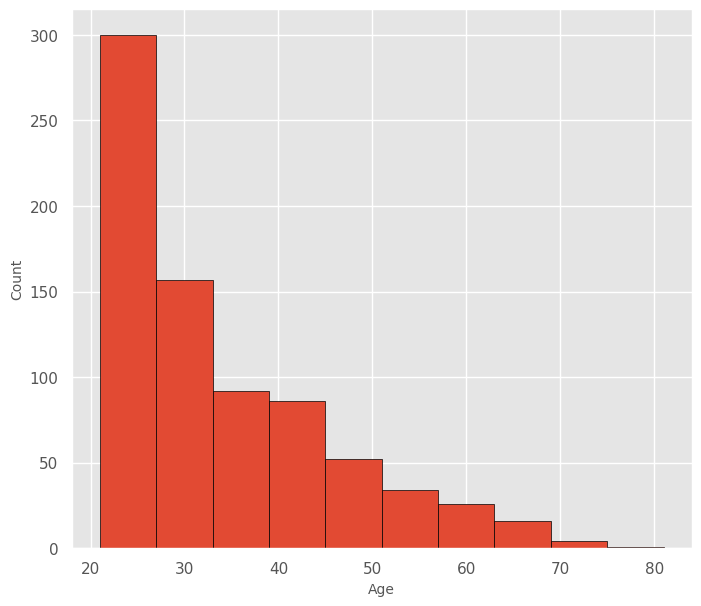

In [ ]:
#plot hist for age
plt.figure(figsize=(8,7))
plt.xlabel('Age' , fontsize=10)
plt.ylabel('Count', fontsize=10)
df['Age'].hist(edgecolor="black")

In [ ]:
df['Age'].max()

81

In [ ]:
print("MIN AGE: "+str(df['Age'].min()))
print("MAX AGE: "+str(df['Age'].max()))

MIN AGE: 21
MAX AGE: 81


<Axes: xlabel='Age', ylabel='Density'>

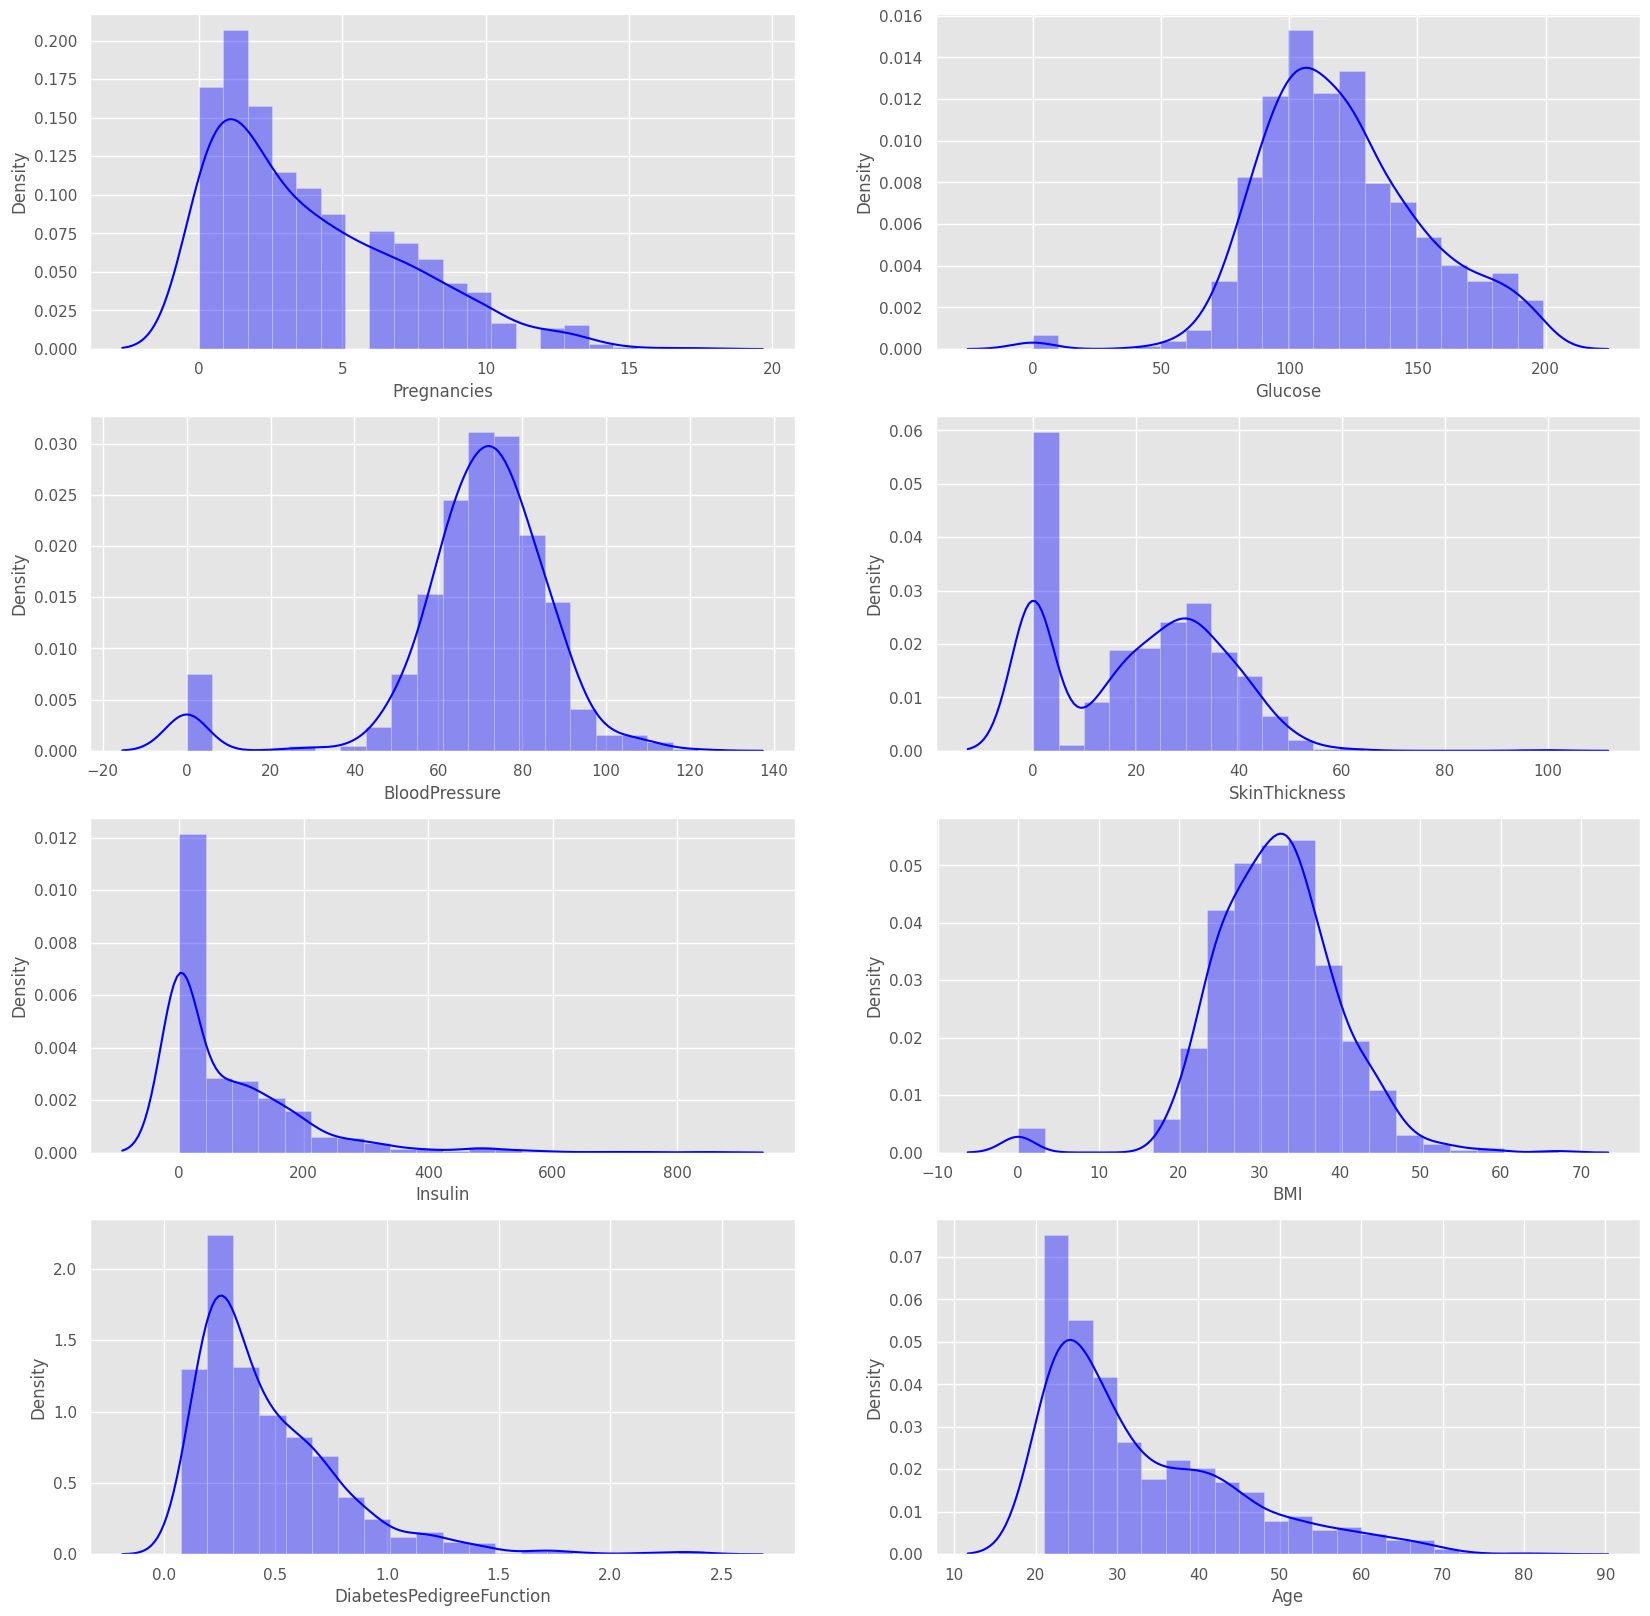

In [ ]:
# density graph

fig,ax = plt.subplots(4,2, figsize=(20,20))
sns.distplot(df.Pregnancies, bins = 20, ax=ax[0,0], color = "blue")
sns.distplot(df.Glucose, bins = 20, ax=ax[0,1], color = "blue")
sns.distplot(df.BloodPressure, bins = 20, ax=ax[1,0], color = "blue")
sns.distplot(df.SkinThickness, bins = 20, ax=ax[1,1], color = "blue")
sns.distplot(df.Insulin, bins = 20, ax=ax[2,0], color = "blue")
sns.distplot(df.BMI, bins = 20, ax=ax[2,1], color = "blue")
sns.distplot(df.DiabetesPedigreeFunction, bins = 20, ax=ax[3,0], color = "blue")
sns.distplot(df.Age, bins = 20, ax=ax[3,1], color = "blue")

In [ ]:
#Example of being able to see the mean of each outcome for a particular coloumn
df.groupby("Outcome").agg({'Pregnancies':'mean'})


,Pregnancies
Outcome,
0,3.298
1,4.866


In [ ]:
#Example of being able to see the max of each outcome for a particular coloumn
df.groupby("Outcome").agg({'Pregnancies':'max'})

,Pregnancies
Outcome,
0,13
1,17


In [ ]:
#Example of being able to see the max of each outcome for a particular coloumn

df.groupby("Outcome").agg({'Glucose':'max'})

,Glucose
Outcome,
0,197
1,199


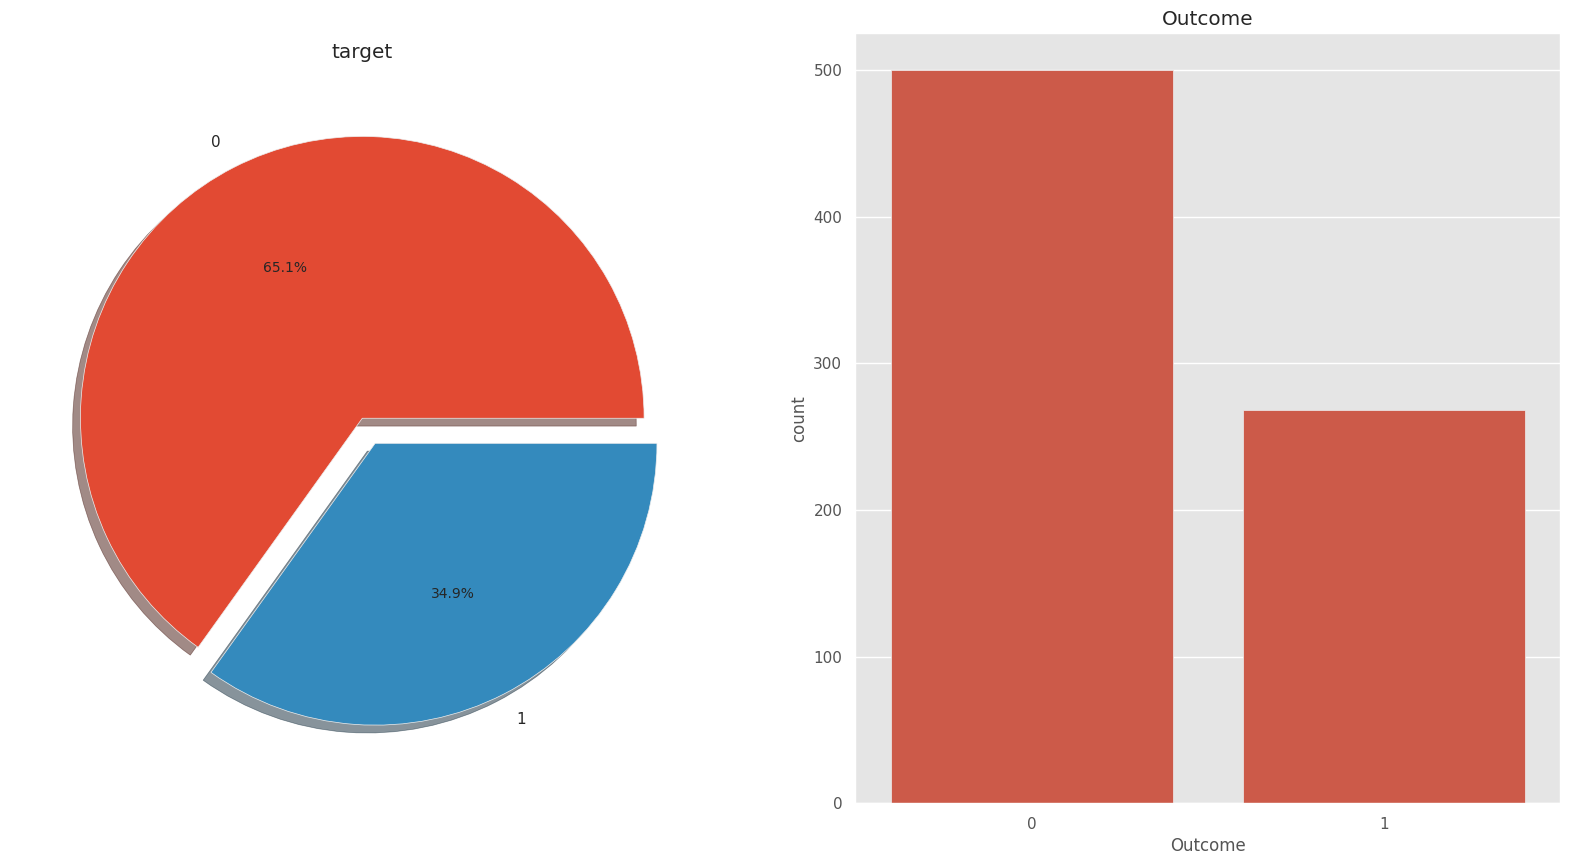

In [ ]:
#visual representation of the number of people without diabetes versus with diabetes in the dataset
f, ax = plt.subplots(1,2, figsize=(20,10))
df['Outcome'].value_counts().plot.pie(explode=[0,0.1], autopct = '%1.1f%%', ax=ax[0], shadow = True)
ax[0].set_title('target')
ax[0].set_ylabel('')
sns.countplot(x = 'Outcome', data=df, ax=ax[1])
ax[1].set_title('Outcome')
plt.show()


In [ ]:
#Numerical correlation among different health metrics for having diabetes
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000,0.129,0.141,-0.082,-0.074,0.018,-0.034,0.544,0.222
Glucose,0.129,1.000,0.153,0.057,0.331,0.221,0.137,0.264,0.467
BloodPressure,0.141,0.153,1.000,0.207,0.089,0.282,0.041,0.240,0.065
SkinThickness,-0.082,0.057,0.207,1.000,0.437,0.393,0.184,-0.114,0.075
Insulin,-0.074,0.331,0.089,0.437,1.000,0.198,0.185,-0.042,0.131
BMI,0.018,0.221,0.282,0.393,0.198,1.000,0.141,0.036,0.293
DiabetesPedigreeFunction,-0.034,0.137,0.041,0.184,0.185,0.141,1.000,0.034,0.174
Age,0.544,0.264,0.240,-0.114,-0.042,0.036,0.034,1.000,0.238
Outcome,0.222,0.467,0.065,0.075,0.131,0.293,0.174,0.238,1.000


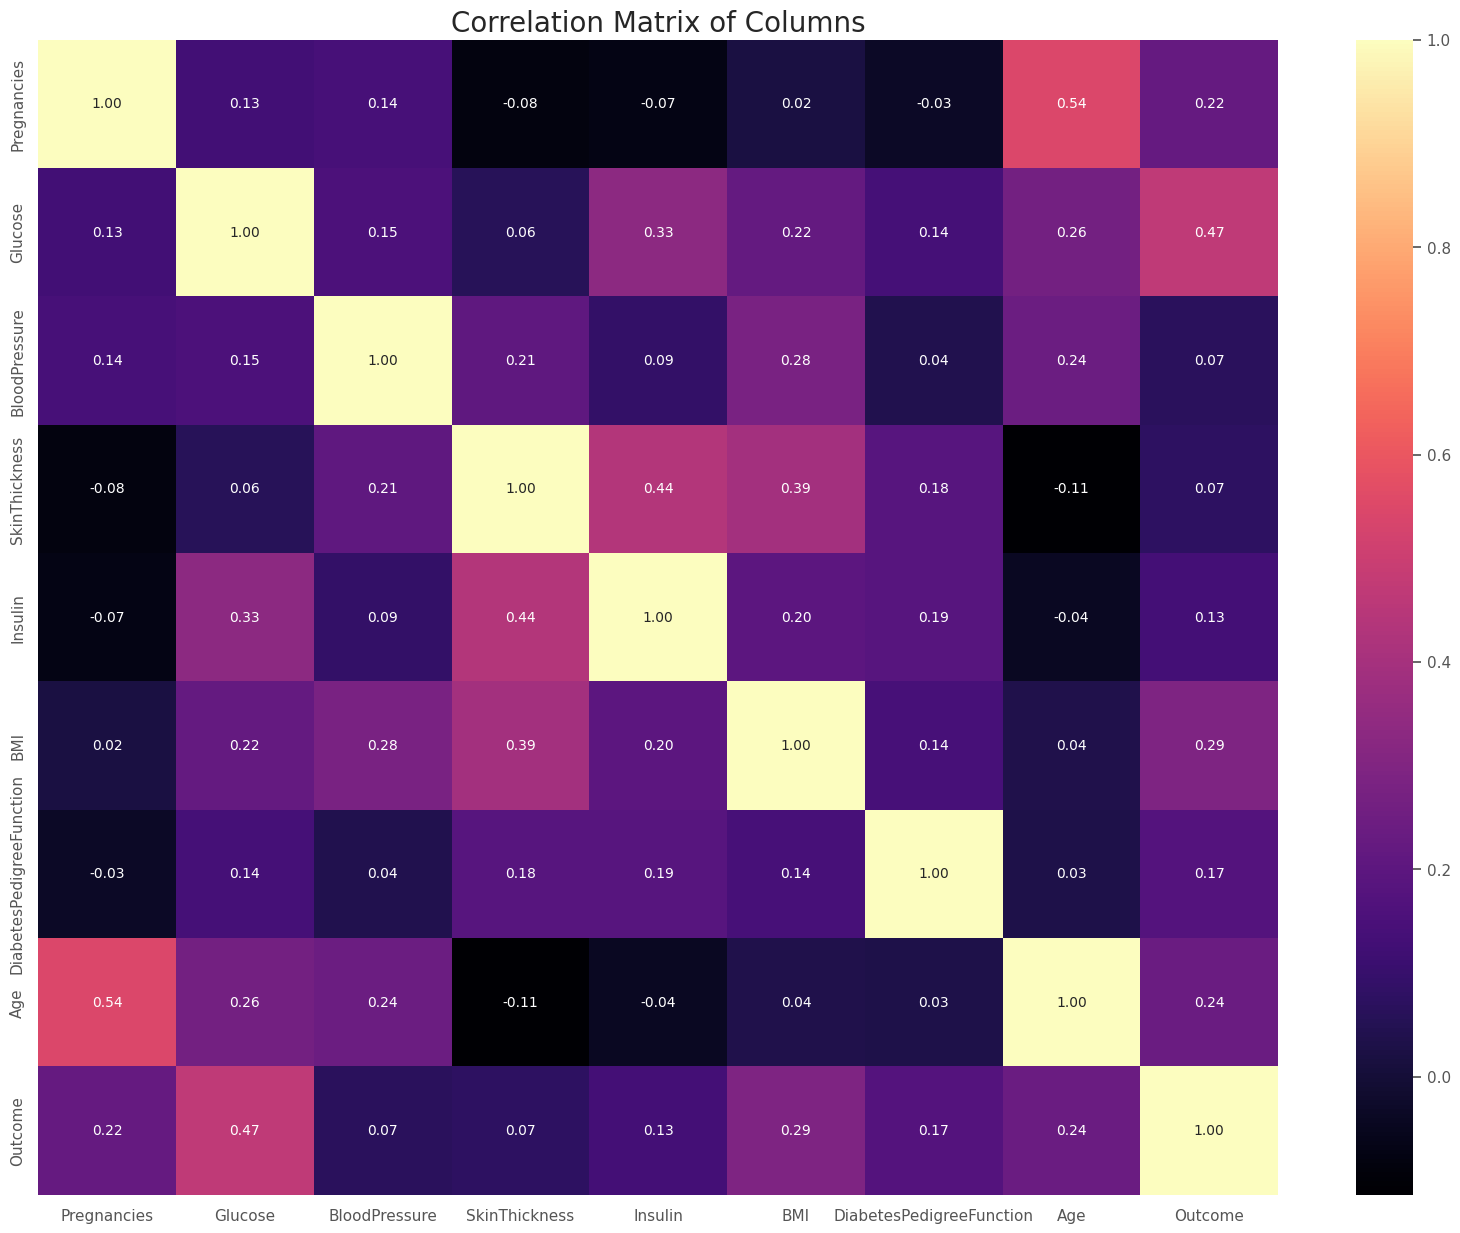

In [ ]:
#Visual representation among different health metrics for having diabetes

f, ax = plt.subplots(figsize=[20,15])
sns.heatmap(df.corr(), annot=True , fmt='.2f', ax=ax, cmap='magma')
ax.set_title("Correlation Matrix of Columns", fontsize=20)
plt.show()


In [ ]:
## Below is transforming that data so we can detect null values by making them NaN


In [ ]:
## Before processing no data is shown as null since vaulues are 0
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [ ]:
## Not we don't change pregnancies at 0 to null because 0 is a valid input
df[[ 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age' ]] = df[[ 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']].replace(0, np.NaN)

In [ ]:
## After preprocessing noticing how much data is null/missing
df.isnull().sum()

,0
Pregnancies,0
Glucose,5
BloodPressure,35
SkinThickness,227
Insulin,374
BMI,11
DiabetesPedigreeFunction,0
Age,0
Outcome,0


<Axes: >

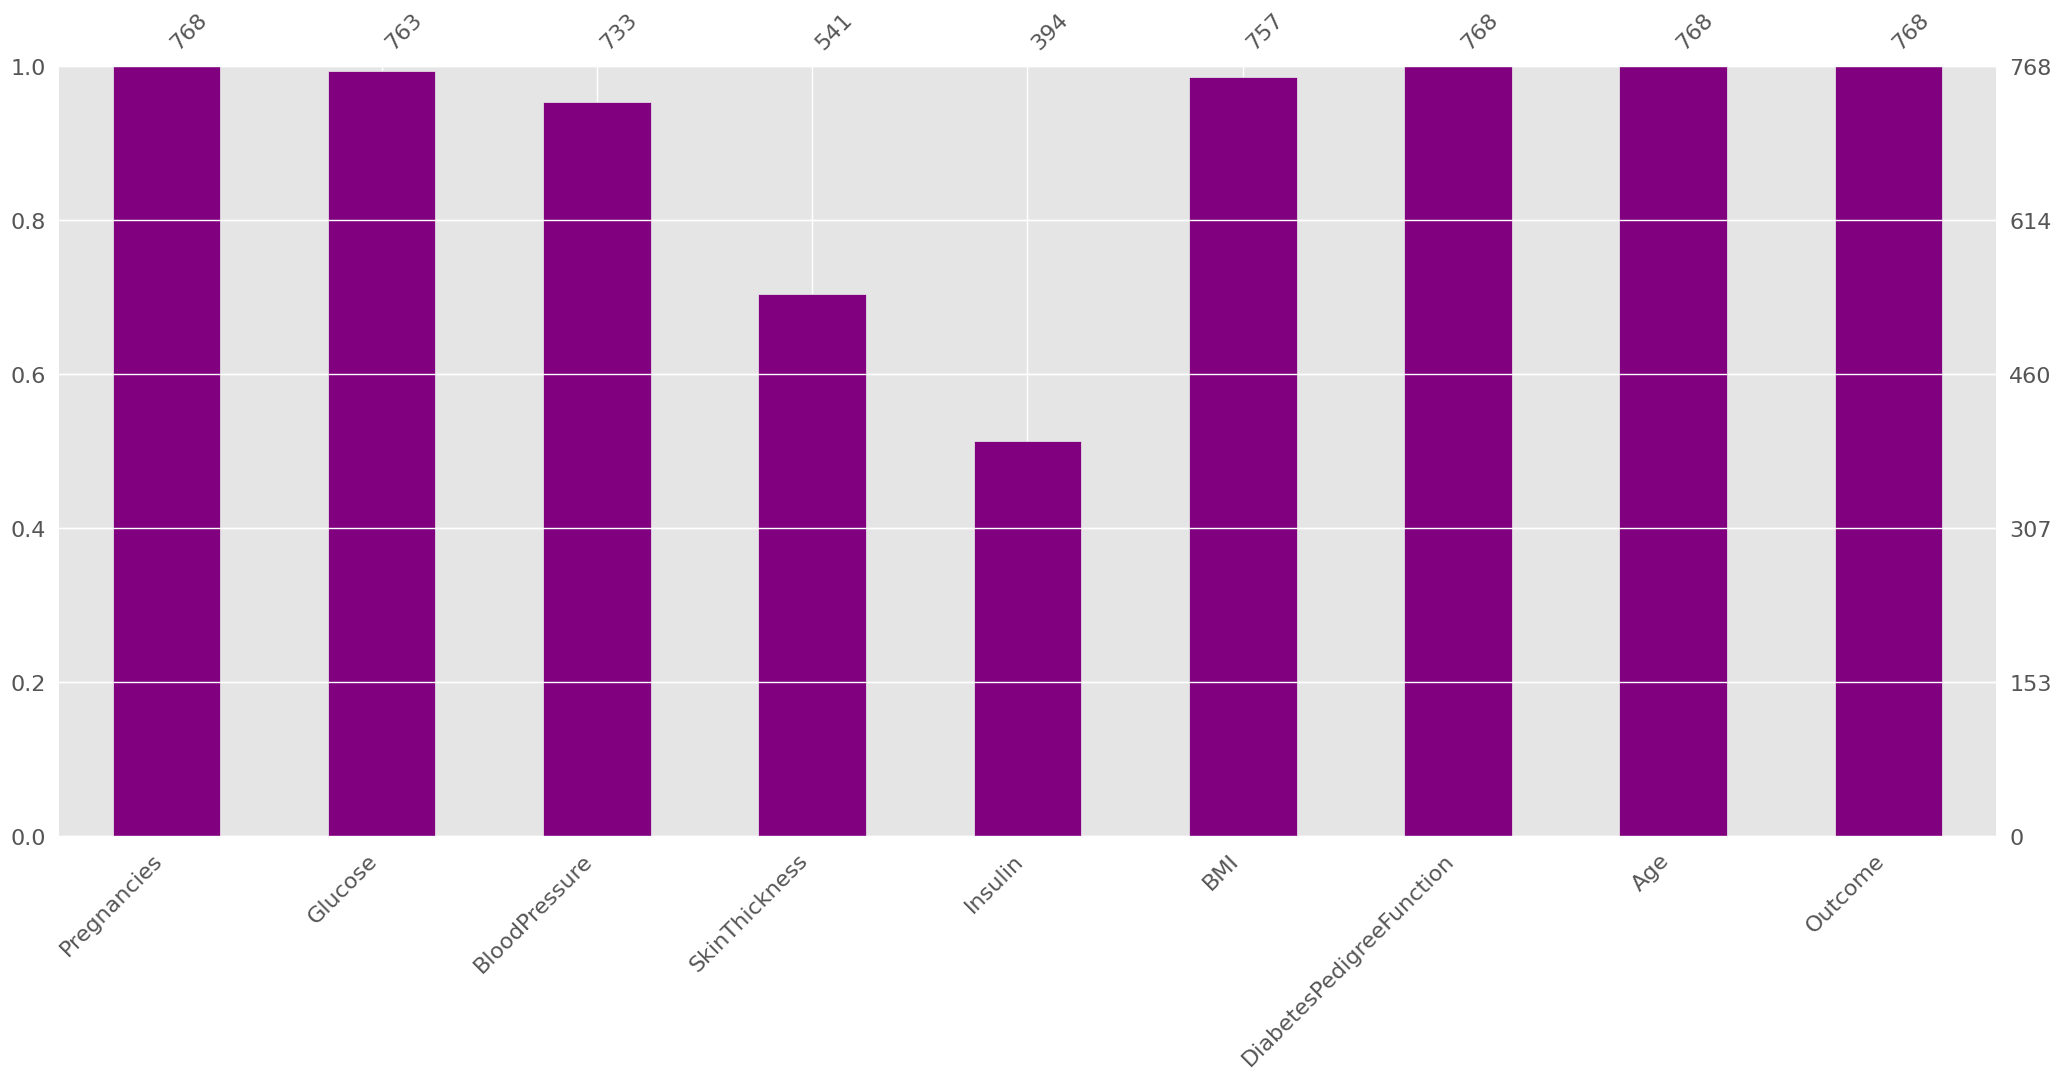

In [ ]:
## the higher the bar the less null values there are
import missingno as msno
msno.bar(df, color="purple")

In [ ]:
def median_target(var):
  temp = df[df[var].notnull()]
  temp = temp[[var, 'Outcome']].groupby(['Outcome'])[[var]].median().reset_index()
  return temp

In [ ]:
## In order to get rid of null values, we are assign nulls to the median of the outcome 0 and 1 respectively.
columns = df.columns
columns = columns.drop('Outcome')
for i in columns:
  median_target(i)
  df.loc[(df['Outcome']==0)  & (df[i].isnull()), i] = median_target(i)[i][0]
  df.loc[(df['Outcome']==1)  & (df[i].isnull()), i] = median_target(i)[i][1]

In [ ]:
#Notice null values are gone
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


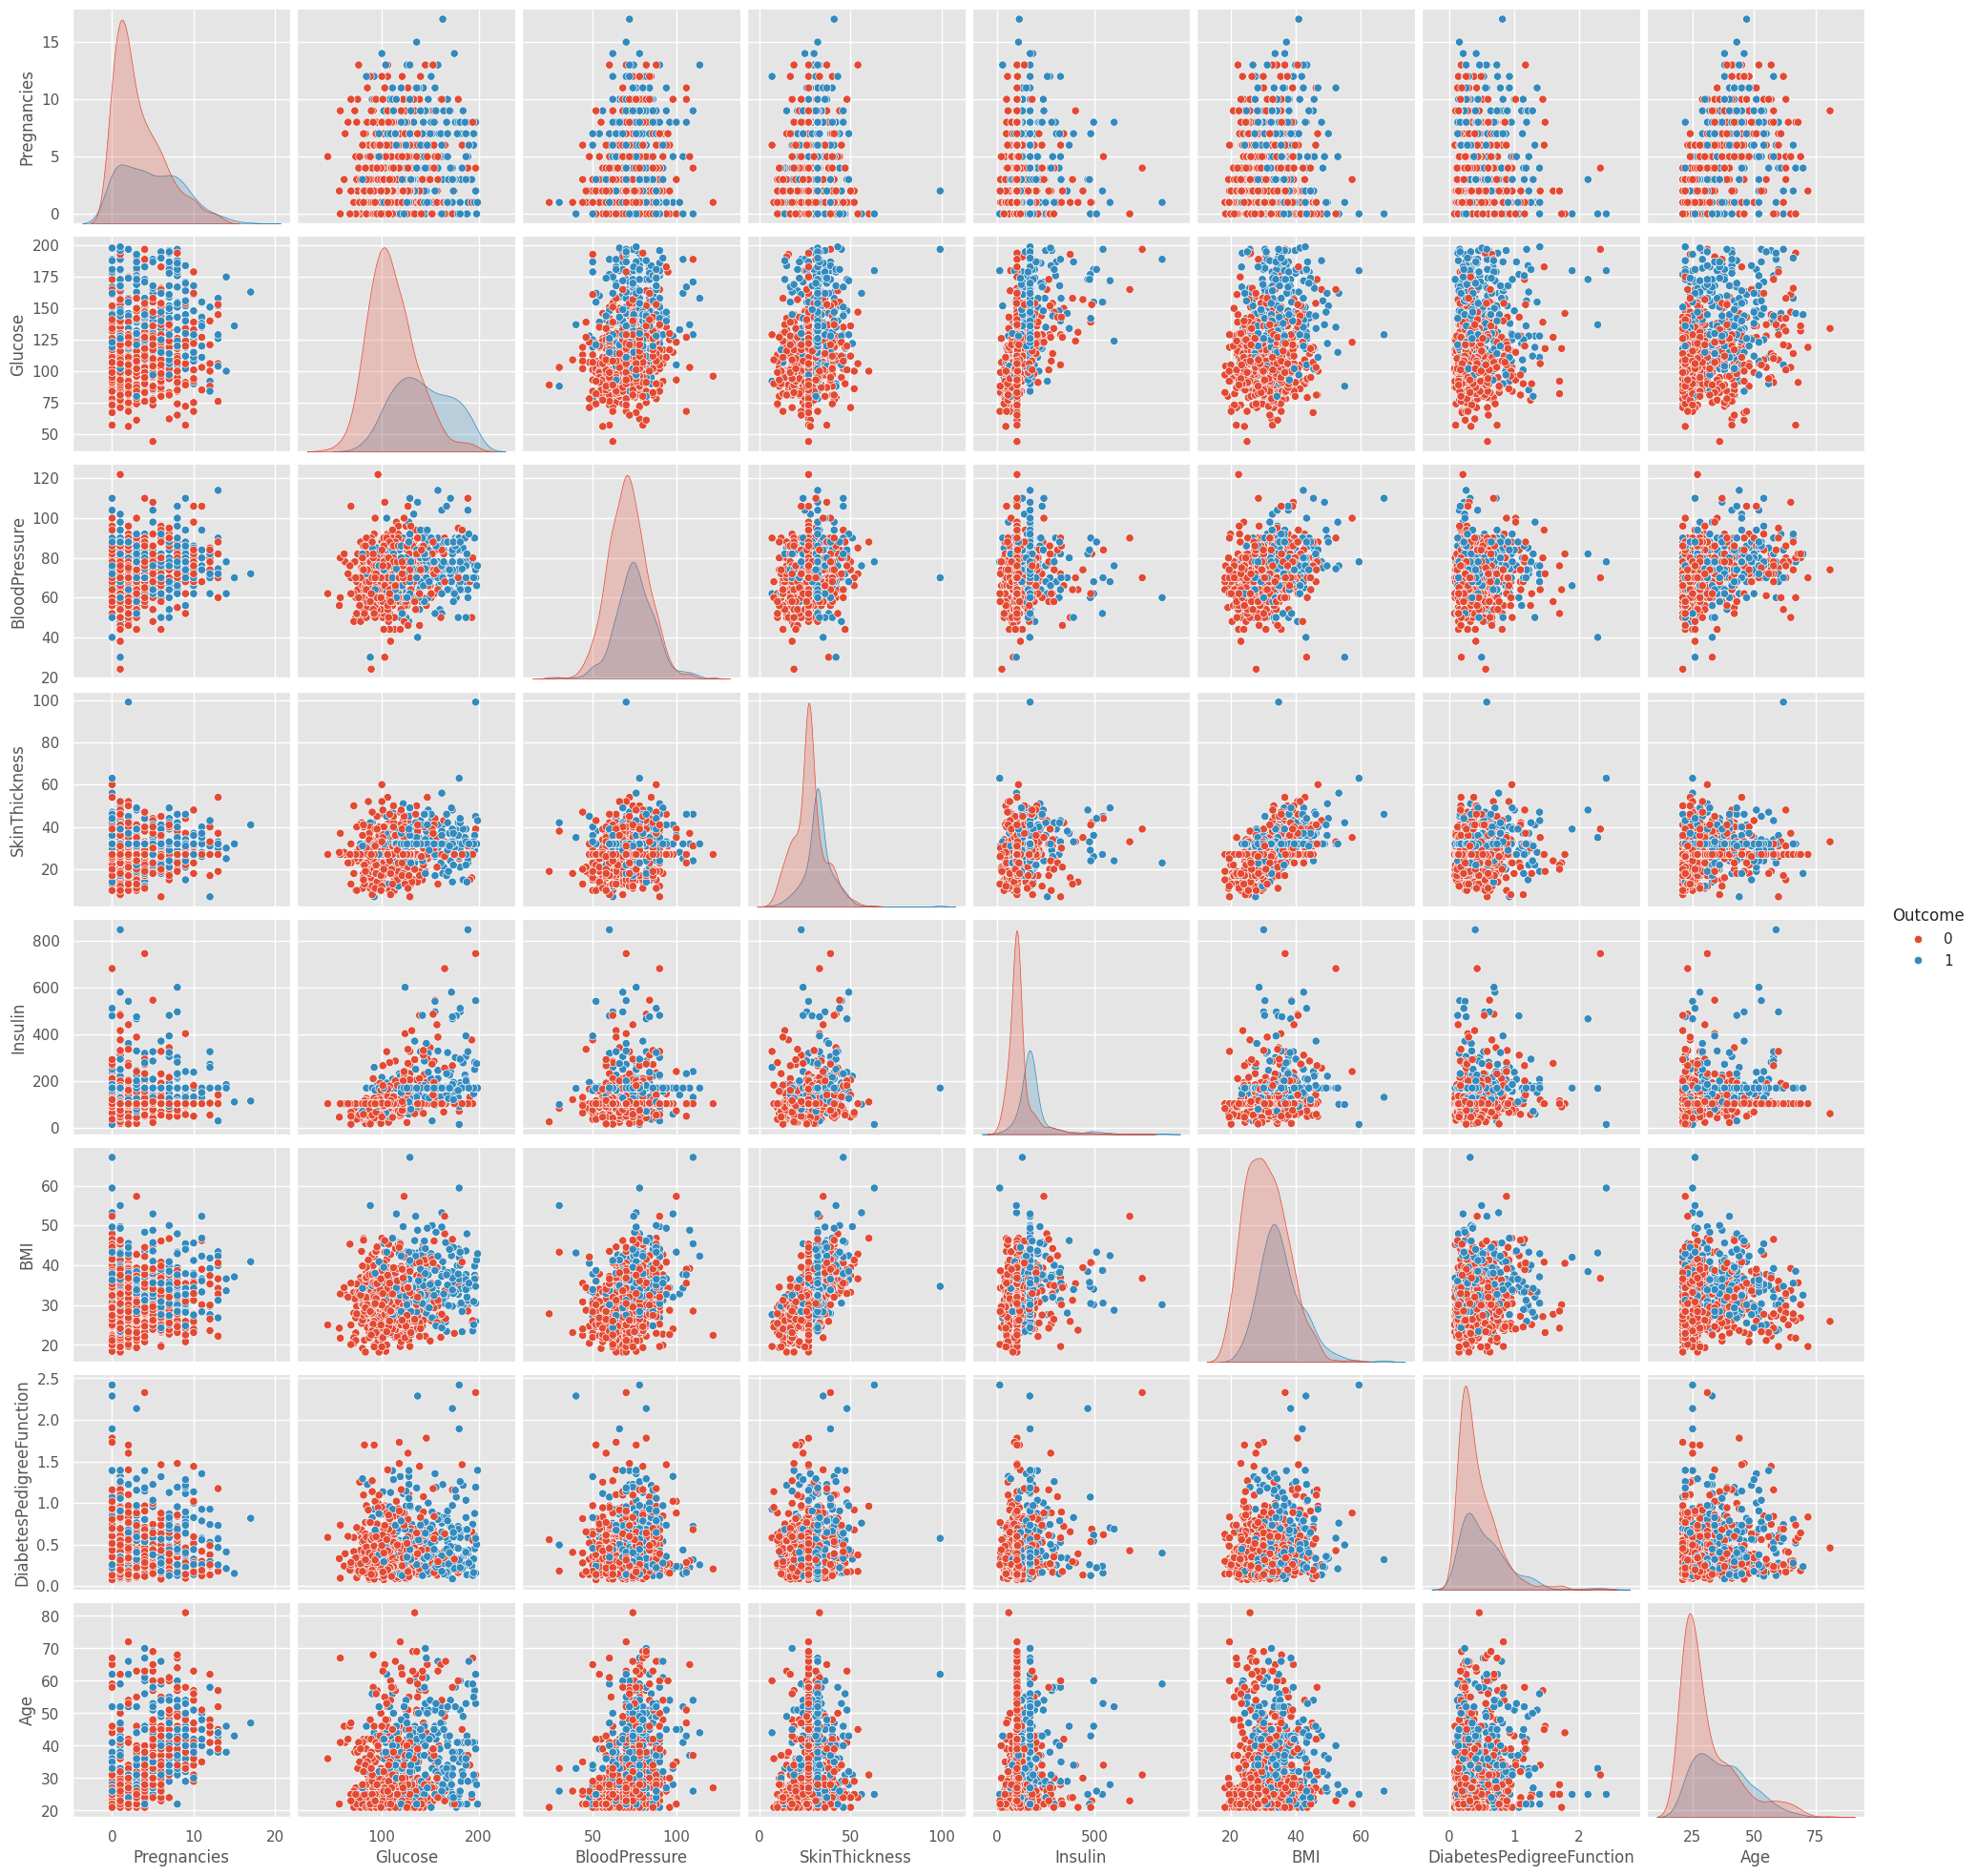

In [ ]:
#vizulization to see outliers
p = sns.pairplot(df, hue='Outcome')

In [ ]:
#Determing outliers and removing them
#uses IQE to detect outliers
#Columns with yes have outliers
#Yes and No are if that column has outliers

for feature in df:
  Q1 = df[feature].quantile(0.25)
  Q3 = df[feature].quantile(0.75)
  IQR = Q3-Q1
  lowwer_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  if df[(df[feature]>upper_bound)].any(axis=None):
    print(feature, "yes")
  else:
    print(feature, "no")

Pregnancies yes
Glucose no
BloodPressure yes
SkinThickness yes
Insulin yes
BMI yes
DiabetesPedigreeFunction yes
Age yes
Outcome no


<Axes: xlabel='Insulin'>

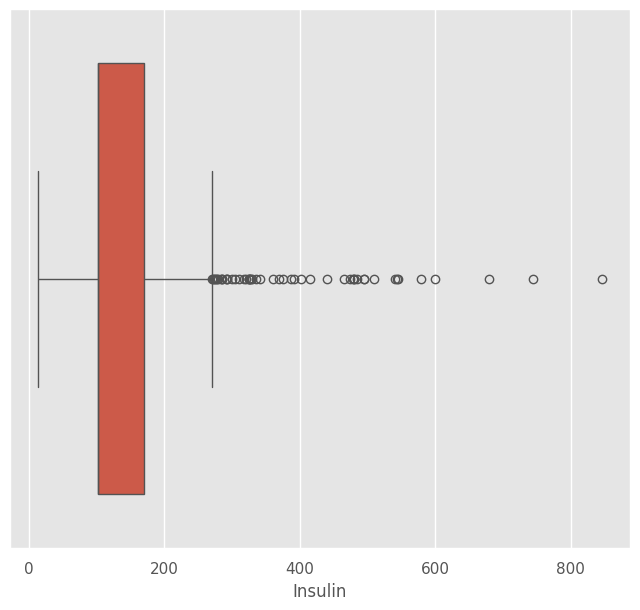

In [ ]:
#Notice there are outliers
plt.figure(figsize=(8,7))
sns.boxplot(x= df["Insulin"])

In [ ]:
#Replacing outliers for all columns with outliers
Q1 = df.Pregnancies.quantile(0.25)
Q3 = df.Pregnancies.quantile(0.75)
IQR = Q3-Q1
lowwer_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df.loc[df['Pregnancies']>upper_bound, "Pregnancies"] = upper_bound

Q1 = df.Insulin.quantile(0.25)
Q3 = df.Insulin.quantile(0.75)
IQR = Q3-Q1
lowwer_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df.loc[df['Insulin']>upper_bound, "Insulin"] = upper_bound

Q1 = df.BloodPressure.quantile(0.25)
Q3 = df.BloodPressure.quantile(0.75)
IQR = Q3-Q1
lowwer_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df.loc[df['BloodPressure']>upper_bound, "BloodPressure"] = upper_bound

Q1 = df.SkinThickness.quantile(0.25)
Q3 = df.SkinThickness.quantile(0.75)
IQR = Q3-Q1
lowwer_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df.loc[df['SkinThickness']>upper_bound, "SkinThickness"] = upper_bound

Q1 = df.Insulin.quantile(0.25)
Q3 = df.Insulin.quantile(0.75)
IQR = Q3-Q1
lowwer_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df.loc[df['Insulin']>upper_bound, "Insulin"] = upper_bound

Q1 = df.BMI.quantile(0.25)
Q3 = df.BMI.quantile(0.75)
IQR = Q3-Q1
lowwer_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df.loc[df['BMI']>upper_bound, "BMI"] = upper_bound

Q1 = df.DiabetesPedigreeFunction.quantile(0.25)
Q3 = df.DiabetesPedigreeFunction.quantile(0.75)
IQR = Q3-Q1
lowwer_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df.loc[df['DiabetesPedigreeFunction']>upper_bound, "DiabetesPedigreeFunction"] = upper_bound

Q1 = df.Age.quantile(0.25)
Q3 = df.Age.quantile(0.75)
IQR = Q3-Q1
lowwer_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df.loc[df['Age']>upper_bound, "Age"] = upper_bound


<Axes: xlabel='Insulin'>

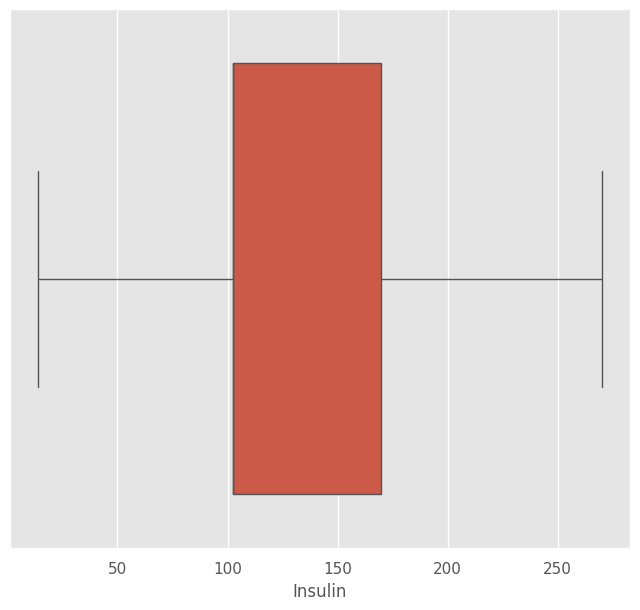

In [ ]:
#Notice there are no more outliers
plt.figure(figsize=(8,7))
sns.boxplot(x= df["Insulin"])

In [ ]:
#Notice there are no more outliers
for feature in df:
  Q1 = df[feature].quantile(0.25)
  Q3 = df[feature].quantile(0.75)
  IQR = Q3-Q1
  lowwer_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  if df[(df[feature]>upper_bound)].any(axis=None):
    print(feature, "yes")
  else:
    print(feature, "no")

Pregnancies no
Glucose no
BloodPressure no
SkinThickness no
Insulin no
BMI no
DiabetesPedigreeFunction no
Age no
Outcome no


In [ ]:
y=df['Outcome']
X=df.drop(['Outcome'], axis=1)

In [ ]:
cols = X.columns
index = X.index

In [ ]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6.000,148.000,72.000,35.000,169.500,33.600,0.627,50.000
1,1.000,85.000,66.000,29.000,102.500,26.600,0.351,31.000
2,8.000,183.000,64.000,32.000,169.500,23.300,0.672,32.000
3,1.000,89.000,66.000,23.000,94.000,28.100,0.167,21.000
4,0.000,137.000,40.000,35.000,168.000,43.100,1.200,33.000


In [ ]:
#Scaling the data for use
from sklearn.preprocessing import RobustScaler
scale_data = RobustScaler().fit(X)
X=scale_data.transform(X)
X=pd.DataFrame(X, columns= cols, index = index)

In [ ]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.600,0.765,0.000,1.000,1.000,0.170,0.665,1.235
1,-0.400,-0.790,-0.375,0.143,0.000,-0.599,-0.056,0.118
2,1.000,1.630,-0.500,0.571,1.000,-0.962,0.783,0.176
3,-0.400,-0.691,-0.375,-0.714,-0.127,-0.434,-0.537,-0.471
4,-0.600,0.494,-2.000,1.000,0.978,1.214,2.163,0.235


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [ ]:
#Scaling to train the model
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Machine Learning; Logisitic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [ ]:
#Example of predcition method
y_pred = log_reg.predict(X_test)

In [ ]:
# 1 has diabetes, 0 doesn't have diabetes
print(y_pred)

[1 0 0 1 0 0 1 1 1 1 1 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0
 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 1 0 1 1 1 1 0 0 0 0 0 0 1
 1 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 1 1 0 0 0 1 0
 0 1 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0]


In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(y_train, log_reg.predict(X_train))

0.8013029315960912

In [ ]:
accuracy_score(y_test, log_reg.predict(X_test) )

0.8181818181818182

In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)

array([[95, 12],
       [16, 31]])

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.89      0.87       107
           1       0.72      0.66      0.69        47

    accuracy                           0.82       154
   macro avg       0.79      0.77      0.78       154
weighted avg       0.81      0.82      0.82       154



In [ ]:
# #For testing and adjusting the threshold
# input_data_scaled = scale_data.transform(input_data)
# prediction = log_reg.predict(input_data_scaled)
# print("this is the prob" , log_reg.predict_proba(input_data_scaled))
# threshold_prob = .5  # If probability of diabete is about this, state they have it

# probabilities = log_reg.predict_proba(input_data_scaled)
# prediction = (probabilities[:, 1] >= threshold_prob).astype(int)
# print(prediction)
# print(f"Adjusted prediction: {prediction[0]}")


In [ ]:
#@title Diabetes Prediction Tool {"run":"auto"}
#@markdown Please enter your information below to predict outcome: {"run":"auto"}

Pregnancies = 2 #@param {type: "number"}
Glucose = 180 #@param {type: "number"}
BloodPressure = 120 #@param {type: "number"}
SkinThickness = 30 #@param {type: "number"}
Insulin = 100 #@param {type: "number"}
BMI = 35 #@param {type: "number"}
DiabetesPedigreeFunction = 0.7 #@param {type: "number"}
Age = 31 #@param {type: "number"}



from IPython.display import display
import ipywidgets as widgets


def on_run_button_click(b):
  input_data_scaled = scale_data.transform(input_data)
  prediction = log_reg.predict(input_data_scaled)
  #print("this is the prob" , log_reg.predict_proba(input_data_scaled))
  threshold_prob = .4  # If probability of diabetes is above threshold, state they might have it
  probabilities = log_reg.predict_proba(input_data_scaled)
  prediction = (probabilities[:, 1] >= threshold_prob).astype(int)
  if prediction[0] == 1:
    print("You probably have diabetes, a doctor will be in contact with you")
  else:
    print("You probably don't have diabetes")

run_button = widgets.Button(description="Predict for Diabetes")
run_button.on_click(on_run_button_click)
display(run_button)

form_data = {
    "Pregnancies": Pregnancies,
    "Glucose": Glucose,
    "BloodPressure": BloodPressure,
    "SkinThickness": SkinThickness,
    "Insulin": Insulin,
    "BMI": BMI,
    "DiabetesPedigreeFunction": DiabetesPedigreeFunction,
    "Age": Age

}

input_data = np.array([[form_data["Pregnancies"],
                        form_data["Glucose"],
                        form_data["BloodPressure"],
                        form_data["SkinThickness"],
                        form_data["Insulin"],
                        form_data["BMI"],
                        form_data["DiabetesPedigreeFunction"],
                        form_data["Age"]]])




Button(description='Predict for Diabetes', style=ButtonStyle())

You probably have diabetes, a doctor will be in contact with you
